## Analyse des features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
titanic = pd.read_csv("./data/train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Par embarquement

## Par classe

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


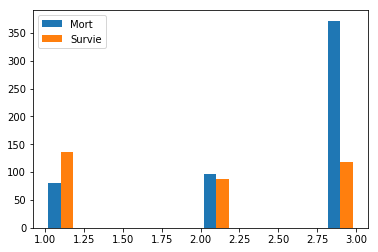

In [2]:
X = titanic.copy()
sexe = pd.get_dummies(X['Sex'], prefix='Pclass')
X = X.join(sexe)
m = titanic[titanic.Survived == 0]['Pclass'].dropna()
s = titanic[titanic.Survived == 1]['Pclass'].dropna()
plt.hist([m, s], label=['Mort', 'Survie'])
plt.legend()

## Par sexe

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


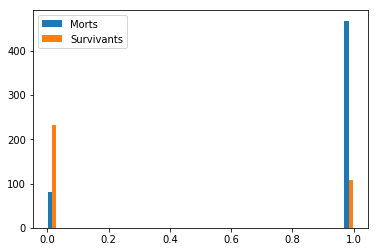

In [3]:
parSexe = [1 if passager == 'male' else 0 for passager in titanic.Sex]
titanic["SexCode"] = [1 if passager == 'male' else 0 for passager in titanic.Sex]
m = titanic[titanic.Survived == 0]["SexCode"].dropna()
s = titanic[titanic.Survived == 1]["SexCode"].dropna()
plt.hist([m, s], label=['Morts', 'Survivants'], bins = 30)
plt.legend()

## Histogramme avec chaine de carractères

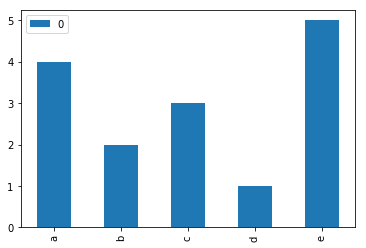

In [4]:
from collections import Counter
a = ['a', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'e', 'e', 'e', 'e', 'e']
letter_counts = Counter(a)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

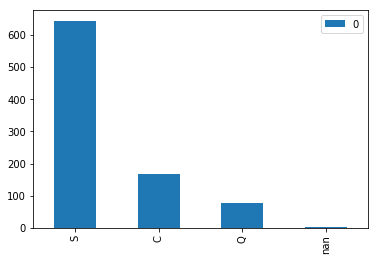

In [5]:
from collections import Counter
def hist_string(df) :
    distincts_count = Counter(df)
    df = pd.DataFrame.from_dict(distincts_count, orient='index')
    df.plot(kind='bar')
hist_string(titanic.Embarked)

In [6]:
df

,0
a,4
b,2
c,3
d,1
e,5


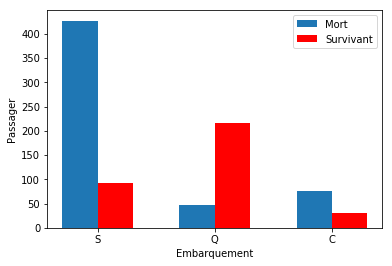

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

l1 = titanic[titanic["Survived"] == 0]["Embarked"].dropna()
l2 = titanic[titanic["Survived"] == 1]["Embarked"].dropna()

# Values lists 1 & 2
count1 = Counter(l1)
counts1 = count1.values()
count2 = Counter(l2)
counts2 = count2.values()
# Labels in x
labels = count1.keys()

# Draw histogram
bar_x = np.arange(len(counts))
plt.bar(bar_x, counts1, 0.3, align = 'center')
plt.bar(bar_x + 0.3, counts2, 0.3, color='r', align = 'center')
plt.xticks(bar_x + 0.15, labels)

plt.ylabel('Passager')
plt.xlabel('Embarquement')
plt.legend(["Mort", "Survivant"])

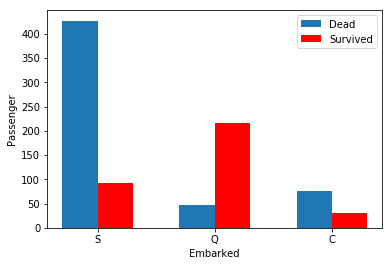

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Dead list
l1 = titanic[titanic["Survived"] == 0]["Embarked"].dropna()
# Survivor list
l2 = titanic[titanic["Survived"] == 1]["Embarked"].dropna()

# draw histogram function
def hist2Str(_l1_Values, _l2_Values, _l1_Label, _l2_Label, _X_Label, _Y_Label):
    step = 0.3
    # Values lists 1 & 2
    count1 = Counter(_l1_Values)
    counts1 = count1.values()
    count2 = Counter(_l2_Values)
    counts2 = count2.values()
    # Labels in x
    labels = count1.keys()

    # Draw histogram
    bar_x = np.arange(len(counts))
    plt.bar(bar_x, counts1, step, align = 'center')
    plt.bar(bar_x + step, counts2, step, color='r', align = 'center')
    plt.xticks(bar_x + step/2, labels)
    # Axis labels & draw
    plt.ylabel(_Y_Label)
    plt.xlabel(_X_Label)
    plt.legend([_l1_Label, _l2_Label])
    plt.draw()
hist2Str(l1, l2, "Dead", "Survived", "Embarked", "Passenger")